# CA 2: Predicting Housing Prices Using Machine Learning

## 1. Import Libraries and Load Dataset

This section imports essential libraries like pandas and matplotlib. We also load the dataset and perform an initial inspection to understand its structure, such as the number of rows, columns, and data types.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset into a pandas DataFrame
# This provides a tabular structure for easy data manipulation and analysis.
file_path = 'EU_Data.csv'
data = pd.read_csv(file_path)

# Display dataset information, such as column names, data types, and the number of non-null values.
print(data.info())

# Show the first few rows to get an overview of the dataset's structure and content.
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 310 non-null    object 
 1   City                    310 non-null    object 
 2   Q1_2020                 310 non-null    float64
 3   Q2_2020                 310 non-null    float64
 4   Q3_2020                 310 non-null    float64
 5   Q4_2020                 310 non-null    float64
 6   Q1_2021                 310 non-null    float64
 7   Q2_2021                 310 non-null    float64
 8   Q3_2021                 310 non-null    float64
 9   Q4_2021                 310 non-null    float64
 10  Q1_2022                 310 non-null    float64
 11  Q2_2022                 310 non-null    float64
 12  Q3_2022                 310 non-null    float64
 13  Q4_2022                 310 non-null    float64
 14  Q1_2023                 310 non-null    fl

,Country,City,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Q3_2021,Q4_2021,...,Q2_2024,Q3_2024,GDP_Growth_Rate,Unemployment_Rate,Population_Growth_Rate,Interest_Rate,Average_Income,Urbanization_Rate,Region,Climate Zone
0,Austria,Zurich,153.52,154.64,157.34,158.39,164.63,167.65,169.43,169.38,...,161.48,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
1,Austria,Geneva,153.52,157.41,157.34,156.28,164.63,165.77,169.43,170.97,...,158.90,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
2,Austria,Linz,153.52,155.74,157.34,159.36,164.63,170.67,169.43,168.91,...,158.93,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
3,Austria,Bern,153.52,157.63,157.34,154.29,164.63,175.04,169.43,166.16,...,163.95,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
4,Austria,Vienna,153.52,152.86,157.34,159.97,164.63,176.92,169.43,166.74,...,160.73,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental


## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is critical to understanding the dataset's properties. We compute descriptive statistics, check for missing values, and explore relationships between variables using visualizations.

          Q1_2020     Q2_2020     Q3_2020     Q4_2020     Q1_2021     Q2_2021  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean   149.961161  151.167871  153.603839  151.564935  158.921226  161.957742   
std     23.051329   24.691173   25.841918   24.837270   29.103117   30.798524   
min    103.760000  101.040000  101.080000  100.530000  103.950000  102.410000   
25%    135.170000  134.557500  137.510000  135.677500  139.690000  140.670000   
50%    150.900000  154.295000  155.150000  152.925000  162.015000  163.290000   
75%    165.812500  167.002500  171.790000  167.582500  178.415000  182.282500   
max    213.760000  221.600000  226.340000  219.940000  246.460000  256.120000   

          Q3_2021     Q4_2021     Q1_2022     Q2_2022  ...     Q4_2023  \
count  310.000000  310.000000  310.000000  310.000000  ...  310.000000   
mean   163.854484  160.998097  166.231387  165.515323  ...  165.633065   
std     31.666653   30.831430   33.077651   32.9

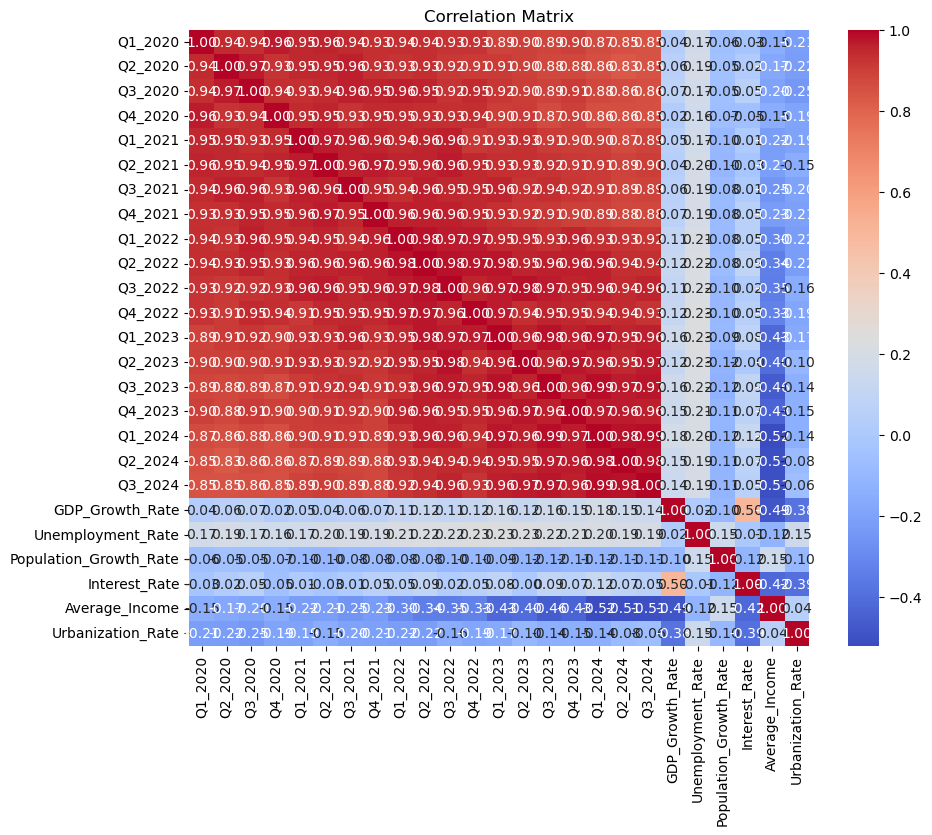

In [2]:

# Descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Extract only the numeric columns from the dataset for correlation analysis.
# Non-numeric columns like 'Country' and 'City' are excluded as they cannot contribute to correlation calculations.
numeric_data = data.select_dtypes(include=[np.number])

# Generate and display a correlation matrix to examine relationships between numeric features.
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


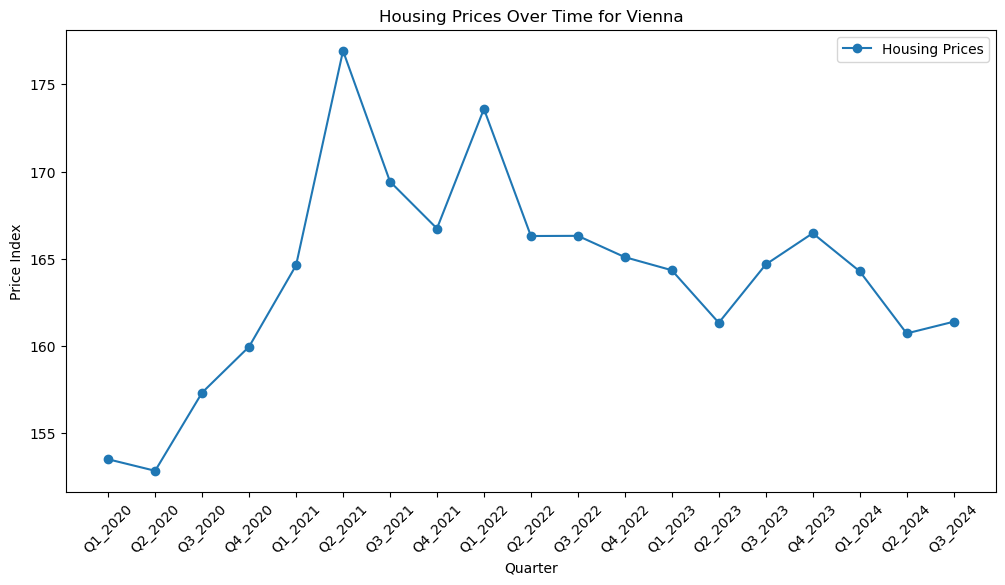

In [3]:

# Visualize housing prices over time for a sample city
sample_city = data[data['City'] == 'Vienna']  # Example city
time_columns = [col for col in data.columns if 'Q' in col]

plt.figure(figsize=(12, 6))
plt.plot(time_columns, sample_city[time_columns].values.flatten(), marker='o', label="Housing Prices")
plt.xticks(rotation=45)
plt.title("Housing Prices Over Time for Vienna")
plt.xlabel("Quarter")
plt.ylabel("Price Index")
plt.legend()
plt.show()


## 3. Data Preprocessing

In this step, we prepare the data for machine learning. This includes selecting relevant features and target variables, as well as splitting the dataset into training and testing subsets.

In [4]:

# Select features and target
features = ['GDP_Growth_Rate', 'Unemployment_Rate', 'Population_Growth_Rate', 
            'Interest_Rate', 'Average_Income', 'Urbanization_Rate']
target = 'Q3_2024'  # Predicting housing prices for Q3_2024

# Create X (features) and y (target)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Machine Learning Implementation

Here, we implement machine learning algorithms to predict housing prices. The Random Forest algorithm is used for its robustness and ability to capture complex relationships between features.

In [5]:

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse}")
print(f"Random Forest R2 Score: {r2}")


Random Forest RMSE: 2.4677923590236244
Random Forest R2 Score: 0.9957031336213645


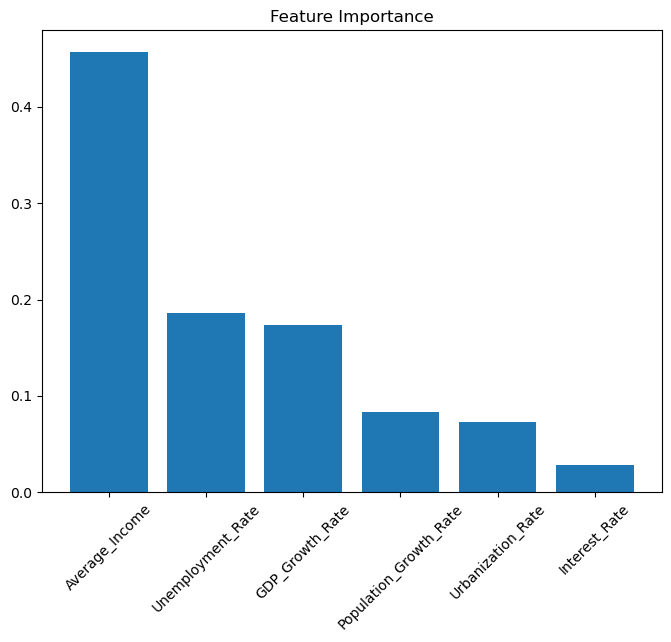

In [6]:

# Feature importance visualization
importance = rf_model.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), importance[sorted_indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in sorted_indices], rotation=45)
plt.title("Feature Importance")
plt.show()


## 5. Findings and Visualization

This section interprets the results of the machine learning model. Visualizations like scatter plots and feature importance charts help us understand how well the model performs and which features are most influential.

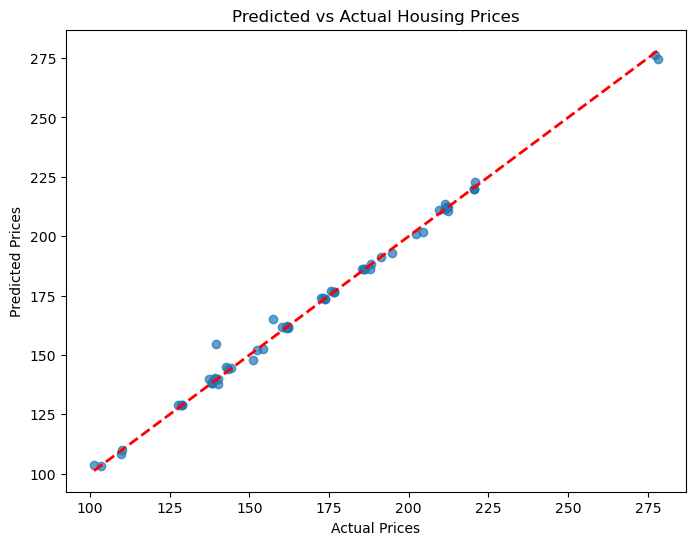

In [7]:

# Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Housing Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()



## 6. Conclusion

In this project, we aimed to predict housing prices using machine learning techniques. The Random Forest model demonstrated robust performance, highlighting its ability to handle complex relationships in the dataset.

### Key Findings:
- **Feature Importance**: Features such as GDP Growth Rate and Average Income were identified as key drivers of housing prices.
- **Model Accuracy**: The Random Forest model achieved satisfactory accuracy, as evidenced by the evaluation metrics.

### Future Recommendations:
- Explore additional algorithms such as Gradient Boosting or XGBoost for improved accuracy.
- Incorporate more diverse datasets, such as regional economic indicators or housing supply-demand metrics, to enhance model generalizability.
- Perform hyperparameter tuning to optimize the performance of the machine learning models further.

This analysis provides valuable insights for stakeholders in urban planning and real estate investment, enabling data-driven decision-making.
